## Imports

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

## Read in the data

In [2]:
df = pd.read_csv('data/austen_poe.csv')
df.head()

,text,author
0,SENSE AND SENSIBILITY,Jane Austen
1,by Jane Austen,Jane Austen
2,(1811),Jane Austen
3,NaN,Jane Austen
4,CHAPTER 1,Jane Austen


In [3]:
df.shape

(19042, 2)

In [4]:
df.isna().sum()

text      1008
author       0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isna().sum()

text      0
author    0
dtype: int64

## Create a column with the length of each text

In [6]:
df['text'][0]

' SENSE AND SENSIBILITY'

In [7]:
len(df['text'][0])

22

In [8]:
df['length'] = df['text'].apply(len)
df.head()

,text,author,length
0,SENSE AND SENSIBILITY,Jane Austen,22
1,by Jane Austen,Jane Austen,14
2,(1811),Jane Austen,6
4,CHAPTER 1,Jane Austen,10
5,The family of Dashwood had long been settled ...,Jane Austen,1201


## Create a column with word_count of each text

In [42]:
df['text'][0].split()

['SENSE', 'AND', 'SENSIBILITY']

In [9]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [10]:
df.head()

,text,author,length,word_count
0,SENSE AND SENSIBILITY,Jane Austen,22,3
1,by Jane Austen,Jane Austen,14,3
2,(1811),Jane Austen,6,1
4,CHAPTER 1,Jane Austen,10,2
5,The family of Dashwood had long been settled ...,Jane Austen,1201,209


## Describe the data

In [11]:
df.describe()

,length,word_count
count,18034.000000,18034.000000
mean,419.562271,73.568482
std,528.100856,92.984526
min,1.000000,0.000000
25%,86.000000,15.000000
50%,245.000000,44.000000
75%,560.000000,98.000000
max,14695.000000,2614.000000


## Create a dataframe for each author

In [12]:
df.author.unique()

array(['Jane Austen', 'Edgar Allan Poe'], dtype=object)

In [13]:
eap = df[df['author'] == 'Edgar Allan Poe']
ja = df[df['author'] == 'Jane Austen']

## Plot the word counts of one author

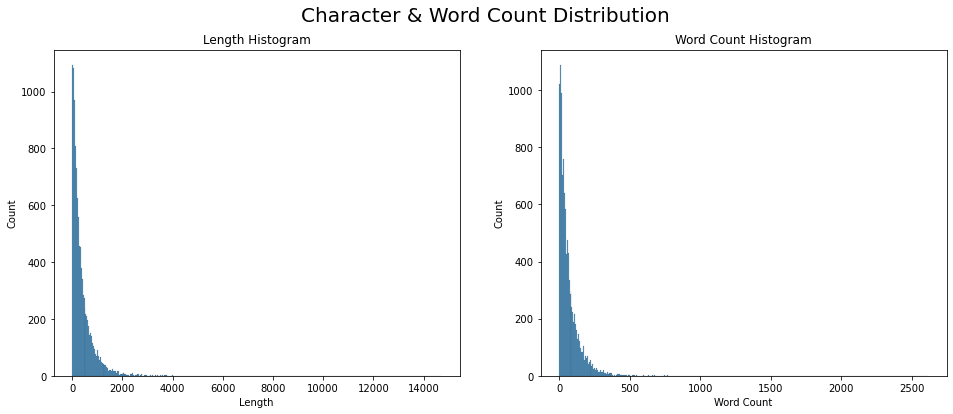

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(ja['length'], ax=ax[0])
sns.histplot(ja['word_count'], ax=ax[1])
ax[0].set(xlabel="Length", ylabel='Count', title='Length Histogram')
ax[1].set(xlabel="Word Count", ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character & Word Count Distribution', fontsize=20);

## Vectorize the data

In [29]:
cv = CountVectorizer()
eap_vect = cv.fit_transform(eap['text'])
eap_vect_df = pd.DataFrame(eap_vect.todense(), columns=cv.get_feature_names_out())
eap_vect_df.head()

,00,000,0000258,000157,000th,02,05484,06,071,080,...,ærostation,æschylus,æstheticus,æthera,ætna,émeutes,érigé,être,μελλοντα,ταυτα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
ja_vect = cv.fit_transform(ja['text'])
ja_vect_df = pd.DataFrame(ja_vect.todense(), columns=cv.get_feature_names_out())
ja_vect_df.head()

,000,10,10th,11,11th,12,12th,13,1399,13th,...,yourselves,youth,youthful,youths,yrs,zeal,zealous,zealously,zephyr,zigzags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Plot the Most Frequently Occurring Words by Author

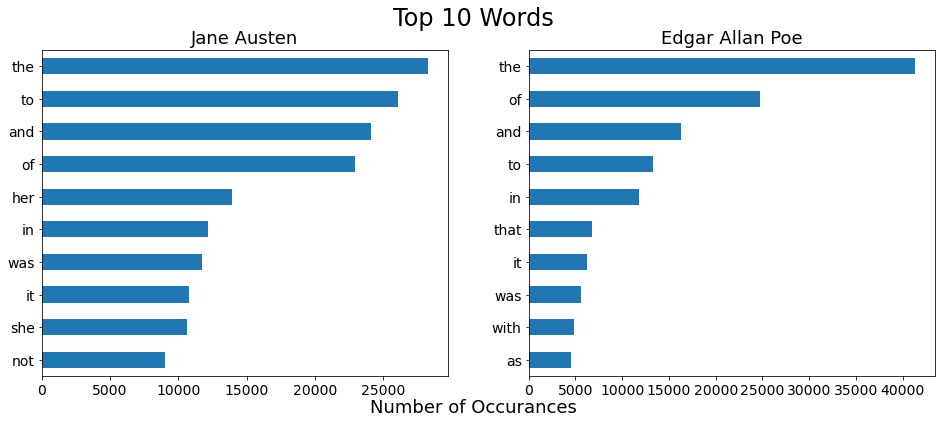

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ja_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
eap_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Jane Austen', fontsize=18)
ax[1].set_title('Edgar Allan Poe', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);

## Vectorize and plot again but using 'english' stopwords

In [35]:
cv = CountVectorizer(stop_words='english')
eap_vect = cv.fit_transform(eap['text'])
eap_vect_df = pd.DataFrame(eap_vect.todense(), columns=cv.get_feature_names_out())

ja_vect = cv.fit_transform(ja['text'])
ja_vect_df = pd.DataFrame(ja_vect.todense(), columns=cv.get_feature_names_out())

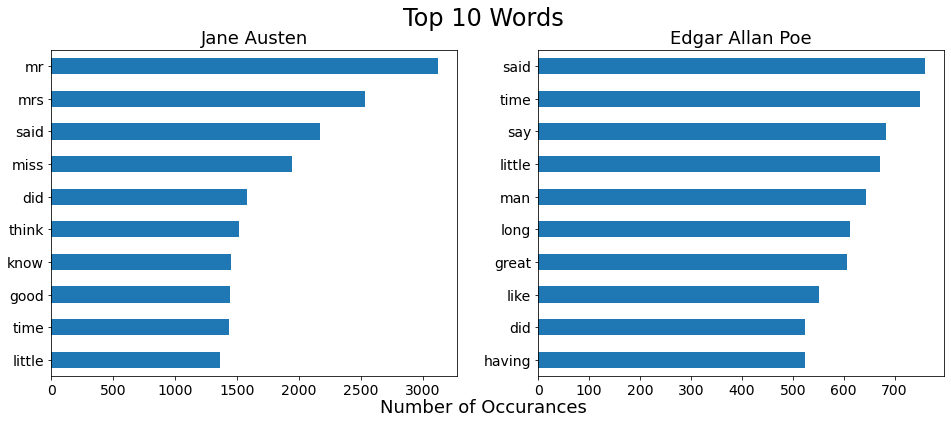

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ja_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
eap_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Jane Austen', fontsize=18)
ax[1].set_title('Edgar Allan Poe', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);

## Vectorize and plot again but using 'english' stopwords and bigrams

In [40]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
eap_vect = cv.fit_transform(eap['text'])
eap_vect_df = pd.DataFrame(eap_vect.todense(), columns=cv.get_feature_names())

ja_vect = cv.fit_transform(ja['text'])
ja_vect_df = pd.DataFrame(ja_vect.todense(), columns=cv.get_feature_names())

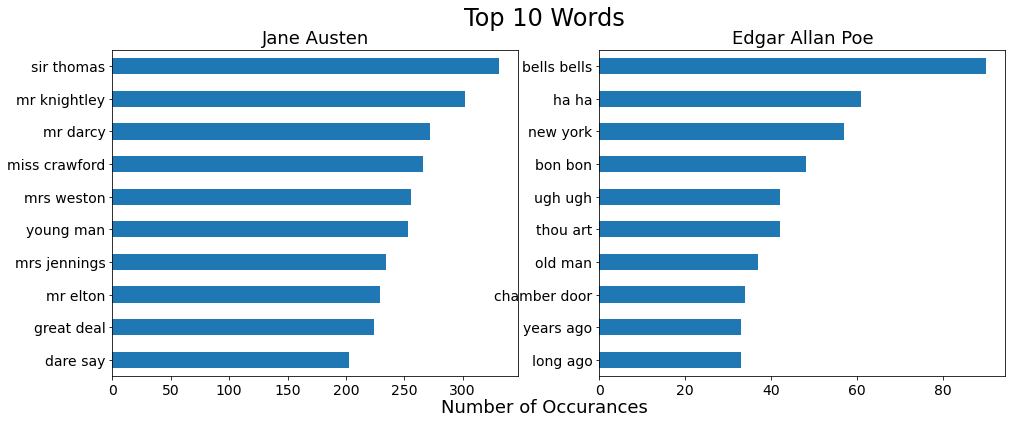

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ja_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
eap_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Jane Austen', fontsize=18)
ax[1].set_title('Edgar Allan Poe', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);